In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.anova import anova_lm
from ISLP.models import summarize, poly
from ISLP.models import ModelSpec as MS
from ISLP import load_data

%matplotlib inline

## Conceptual

### **Q1.** 
The p-values in table 3.4 correspond to null hypotheses where their respective coeffecient equals 0.
$$
\beta_{intercept} = 0 \newline
\beta_{TV} = 0 \newline
\beta_{radio} = 0 \newline
\beta_{newspaper} = 0 
$$

From the p-value results in that table we can reject the null hypothesis for the `intercept`,`TV`,`radio` because of their very small p-values, however we fail to reject the null hypothesis for the `newspaper` because of its big p-value.

### **Q2.**
The KNN classifier predicts the class of a given value based on the k nearest neighbors to that value. 

The KNN regression tries to fit a curve using the average of the k nearest neighbors to the point. 

### **Q3.**

In [2]:
b0 = 50
b1 = 20 
b2 = 0.07
b3 = 35
b4 = 0.01
b5 = -10

def predict(GPA: float, IQ: int, College: bool):
    return b0 + b1 * GPA + b2 * IQ + b3 * College + b4 * (GPA * IQ) + b5 * (GPA * College)

In [3]:
GPA = np.arange(2, 4.1, 0.1)
IQ = 100
np.nonzero(np.isclose(predict(GPA, IQ, 1), predict(GPA, IQ, 0)) == 1), GPA[15]

((array([15]),), 3.5000000000000013)

In [4]:
np.mean(predict(GPA[15:], IQ, 0))

135.75000000000003

In [5]:
np.mean(predict(GPA[15:], IQ, 1))

133.25

**(a)** Statements 3 is correct, because high school graduates earn more on average given the GPA is 3.5 or greater. The increase for going to college (35) is negated by the interaction effect of GPA and Level which has a coefficient of -10. At GPA 3.5 they'd be equal and cancel eachother out. As for GPAs less than 3.5 college graduates earn more.

**(b)** $137.1k

In [6]:
predict(4.0, 110, 1)

137.1

**(C)** False, because the value of the coefficient isn't what affects our confidence in the result rather it's the p-value for that coefficient. 

### **Q4.**


**(a)** We would expect the $RSS_{training}$ for **the cubic regression** to be smaller than that of the linear regression since the cubic would fit closer to the actual points in the dataset. (though this is not a good thing in this case as it's fitting to the noise in the data (overfitting) while the true relationship is linear)

**(b)** We would expect the $RSS_{test}$ for **the linear regression** to be smaller than the cubic one because the true underlying relationship between X and Y is linear.

**(c)** We would also expect the training RSS to be smaller for **the cubic regression** because it's a more flexible model.

**(d)** There's **not enough information** to tell which test RSS would end up smaller as that depends on how close the underlying relationship is to a linear or a cubic relationship. 

### **Q5.**

$$
\hat{y_i} = x_i \hat{\beta} \\
$$
$$
\hat\beta = (\sum_{i=1}^{n} x_i y_i) / (\sum_{i'=1}^{n} x_{i'}^2)\\
$$
$$
\hat\beta = \frac{x_1 y_1 + x_2 y_2 + ... + x_n y_n}{x_1^2 + x_2 ^2 + ... + x_n ^2}
$$


$$
\hat{y_i} = x_i \frac{x_1 y_1 + x_2 y_2 + ... + x_n y_n}{x_1^2 + x_2 ^2 + ... + x_n ^2} \qquad \text{(1)}
$$

$$
\hat{y_i} = \sum_{i'=1}^{n} a_{i'}y_{i'}
$$

$$
\hat{y_i} = a_1 y_1 + a_2 y_2 + ... + a_n y_n \qquad \text{(2)}
$$

Equating $\text{(1)}$ and $\text{(2)}$.

$$
x_i \frac{x_1 y_1 + x_2 y_2 + ... + x_n y_n}{x_1^2 + x_2 ^2 + ... + x_n ^2} = a_1 y_1 + a_2 y_2 + ... + a_n y_n
$$

Equating the coefficients of every $y_{i}$:

$$
a_{i'} = x_i * \frac{x_{i'}}{\sum_{j=1}^{n} x_j^2}
$$

### **Q6.**
It's a simple proof since:
$$
\hat\beta_0 = \bar{y} - \hat\beta_1 \bar{x}
$$
Rewriting it:
$$
\bar{y} = \hat\beta_0 + \hat\beta_1 \bar{x}
$$ 
which is the equation for a straight line with intercept $\hat\beta_0$ and slope $\hat\beta_1$ and passes through the points $\bar{y}$ and $\bar{x}$ and is also the regression line.

### **Q7.**
$$
R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_{i=1}^{n} (y_i -\hat{y_i})^2}{\sum_{i=1}^{n} (y_i -\bar{y_i})^2}
$$

$$
Cor(X, Y) = \frac{\sum_{i=1}^{n} (x_i -\bar{x_i}) (y_i -\bar{y_i})}{\sqrt{\sum_{i=1}^{n} (x_i -\bar{x_i})^2} \sqrt{\sum_{i=1}^{n}(y_i -\bar{y_i})^2}}
$$

Prove that
$$
R^2 = Cor(X, Y)^2
$$

Assuming $\bar{x} = \bar{y} = 0$ for simplicity
$$
Cor(X, Y) = \frac{\sum_{i=1}^{n} x_i y_i}{\sqrt{\sum_{i=1}^{n} x_i^2} \sqrt{\sum_{i=1}^{n}y_i^2}}
$$

Since 
$$
\bar{x} = \bar{y} = 0 \\ 
\hat\beta_0 = \bar{y} - \hat\beta_1 \bar{x}
$$
then 
$$\hat\beta_0 = 0$$
and 
$$
\hat{y_i} = x_i \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} x_{i'}^2} 
$$


$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - x_i \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} x_{i'}^2} )^2}{\sum_{i=1}^{n} y_i^2} 
$$

Setting $ R^2 = Cor(X, Y)^2 $ and substituting for their values.

$$
\frac{(\sum_{i=1}^{n} x_i y_i)^2}{\sum_{i=1}^{n} x_i^2 \sum_{i=1}^{n}y_i^2} =  1 - \frac{\sum_{i=1}^{n} (y_i - x_i \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} x_{i'}^2} )^2}{\sum_{i=1}^{n} y_i^2} 
$$

$$
\frac{(\sum_{i=1}^{n} x_i y_i)^2}{\sum_{i=1}^{n} x_i^2 \sum_{i=1}^{n}y_i^2} =  \frac{\sum_{i=1}^{n} y_i^2 - \sum_{i=1}^{n} (y_i - x_i \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} x_{i'}^2} )^2}{\sum_{i=1}^{n} y_i^2} 
$$

$$
\frac{(\sum_{i=1}^{n} x_i y_i)^2}{\sum_{i=1}^{n} x_i^2} =  \sum_{i=1}^{n} y_i^2 - \sum_{i=1}^{n} (y_i - x_i \frac{\sum_{j=1}^{n} x_j y_j}{\sum_{i'=1}^{n} x_{i'}^2} )^2 
$$

By expanding the squared difference:

$$
\frac{ ( \sum_{i=1}^{n} x_i y_i )^2}{ \sum_{i=1}^{n} x_i^2 } =  \sum_{i=1}^{n} y_i^2 - \sum_{i=1}^{n} (y_i^2 - 2 y_i x_i \frac{\sum_{j=1}^{n} x_j y_j}{\sum_{i'=1}^{n} x_{i'}^2} + (x_i \frac{\sum_{j=1}^{n} x_j y_j}{\sum_{i'=1}^{n} x_{i'}^2})^2) 
$$

$$
\frac{ ( \sum_{i=1}^{n} x_i y_i )^2}{ \sum_{i=1}^{n} x_i^2 } =  \sum_{i=1}^{n} ( 2 y_i x_i \frac{\sum_{j=1}^{n} x_j y_j}{\sum_{i'=1}^{n} x_{i'}^2} - (x_i \frac{\sum_{j=1}^{n} x_j y_j}{\sum_{i'=1}^{n} x_{i'}^2})^2) 
$$

Factoring out $\frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_i^2}$ from both sides

$$
\sum_{i=1}^{n} x_i y_i =  \sum_{i=1}^{n} 2 y_i x_i - x_i^2 \frac{\sum_{j=1}^{n} x_j y_j}{\sum_{i'=1}^{n} x_{i'}^2}
$$

Rearranging to make both sides positive:

$$
\sum_{i=1}^{n} x_i^2 \frac{\sum_{j=1}^{n} x_j y_j}{\sum_{i'=1}^{n} x_{i'}^2} =  \sum_{i=1}^{n} y_i x_i 
$$

Simplifying:

$$
\sum_{j=1}^{n} x_j y_j =  \sum_{i=1}^{n} y_i x_i
$$

We can see that the left handside equals the right handside.

## Applied

### **Q8.**

This question involves the use of simple linear regression on the `Auto`
data set.

In [7]:
auto = load_data('Auto')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [8]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6+ KB


**(a)** Use the `sm.OLS()` function to perform a simple linear regression
with `mpg` as the response and `horsepower` as the predictor. Use
the `summarize()` function to print the results.

In [9]:
horsepower = auto['horsepower']
mpg = auto['mpg']

X = sm.tools.add_constant(horsepower)
X.head()

,const,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150
ford torino,1.0,140


Where `const` is the intercept

In [10]:
y = mpg

model = sm.OLS(y, X)
results1 = model.fit()
summarize(results1)

,coef,std err,t,P>|t|
const,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [11]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           7.03e-81
Time:                        09:33:33   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**i.** Is there a relationship between the predictor and the response?

Yes.

**ii.** How strong is the relationship between the predictor and
the response?

$ R^2 = 0.605 $ So about 60% of the variance in mpg is explained by horsepower.

**iii.** Is the relationship between the predictor and the response
positive or negative?

Negative

**iv.** What is the predicted `mpg` associated with a `horsepower` of
98? What are the associated 95 % confidence and prediction
intervals?

In [12]:
prediction = results1.get_prediction(pd.DataFrame({'const': [1.0], 'horsepower':[98]}))
prediction.predicted_mean

array([24.46707715])

95% Confidence Interval:

In [13]:
prediction.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

95% Prediction Interval:

In [14]:
prediction.conf_int(alpha=0.05, obs=True)

array([[14.80939607, 34.12475823]])

**(b)** Plot the response and the predictor in a new set of axes ax. Use
the `ax.axline()` method or the `abline()` function defined in the
lab to display the least squares regression line.

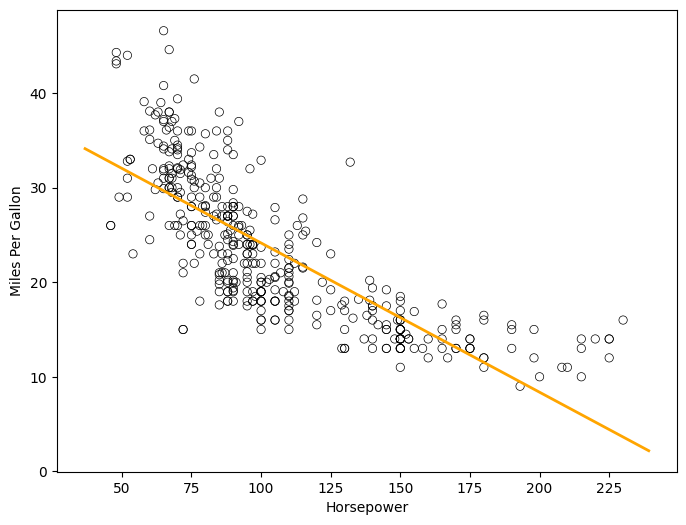

In [15]:
_, axes = plt.subplots(figsize=(8,6))
axes.scatter(horsepower, auto['mpg'], marker='o', facecolors='none', edgecolors='black', linewidths=0.5)
axes.set_xlabel('Horsepower')
axes.set_ylabel('Miles Per Gallon')

intercept, slope = results1.params
xlim = axes.get_xlim()
ylim = [intercept + xlim[0] * slope, intercept + xlim[1] * slope]
axes.plot(xlim, ylim, linewidth=2, color='orange');

**(c)** Produce some of diagnostic plots of the least squares regression
fit as described in the lab. Comment on any problems you see
with the fit.

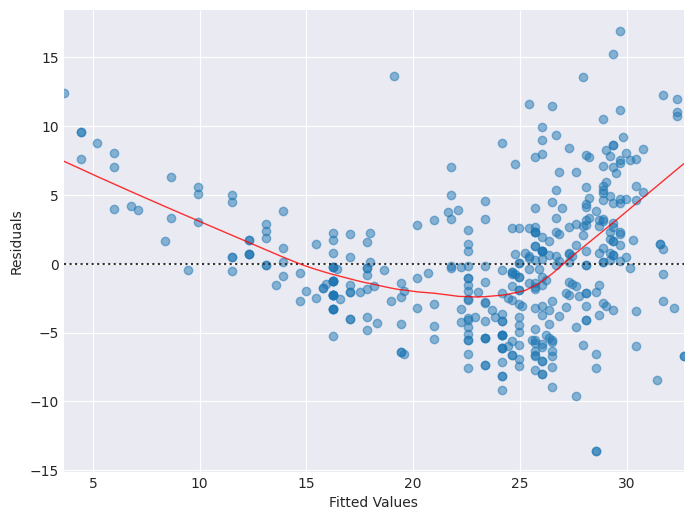

In [16]:
with plt.style.context('seaborn-v0_8-darkgrid'):
    _, ax = plt.subplots(figsize=(8,6))
    ax = sns.residplot(x=results1.fittedvalues,y=y,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    ax.set_xlabel('Fitted Values')
    ax.set_ylabel('Residuals')

There's a clear U-shape in the residuals plot indicating the true underlying relationship isn't linear. 

115

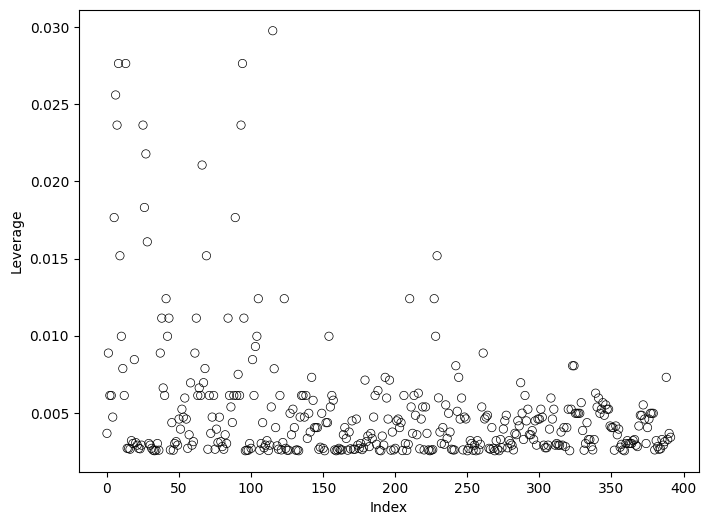

In [17]:
infl = results1.get_influence()
_, ax = plt.subplots(figsize=(8,6))
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag,  marker='o', facecolors='none', edgecolors='black', linewidths=0.5)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

There seems to be a few high leverage points in the data too though we would have to check whether these points have an unusually high leverage.

### **Q9.**
This question involves the use of multiple linear regression on the
Auto data set.

**(a)** Produce a scatterplot matrix which includes all of the variables
in the data set.

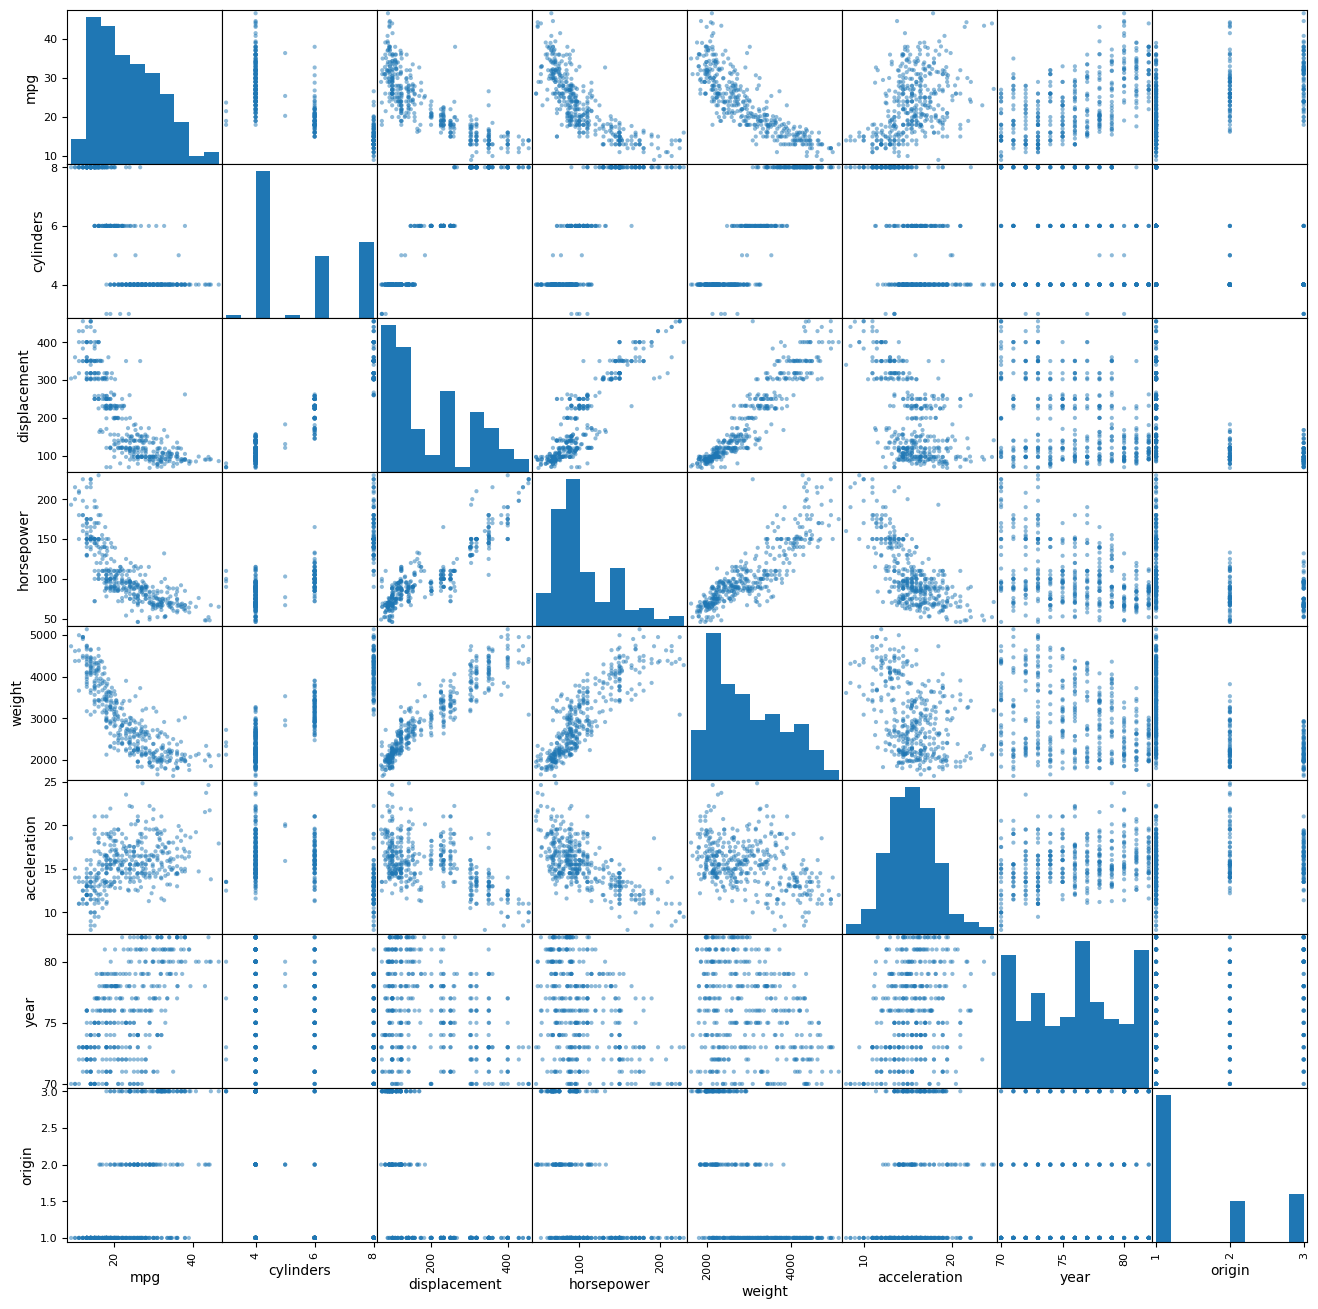

In [18]:
pd.plotting.scatter_matrix(auto, figsize=(16, 16));

**(b)** Compute the matrix of correlations between the variables using
the `DataFrame.corr()` method.

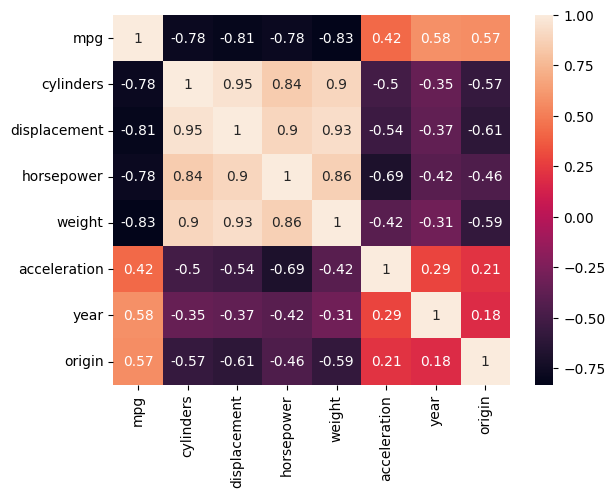

In [19]:
sns.heatmap(auto.corr(), annot=True);

**(c)** Use the `sm.OLS()` function to perform a multiple linear regression
with `mpg` as the response and all other variables except name as
the predictors. Use the `summarize()` function to print the results.
Comment on the output. For instance:

In [20]:
X = auto[auto.columns.drop(['mpg'])]
X.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,
chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,1
buick skylark 320,8,350.0,165,3693,11.5,70,1
plymouth satellite,8,318.0,150,3436,11.0,70,1
amc rebel sst,8,304.0,150,3433,12.0,70,1
ford torino,8,302.0,140,3449,10.5,70,1


In [21]:
y = mpg

X = sm.tools.add_constant(X)
model = sm.OLS(y, X)
results2 = model.fit()
summarize(results2)

,coef,std err,t,P>|t|
const,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


**i.** Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to
answer this question.

In [22]:
anova_lm(results1, results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


Yes there's strong evidence that there's a relationship between the predictors and the response.

**ii.** Which predictors appear to have a statistically significant
relationship to the response?

`displacement`, `weight`, `year`, `origin` all have a statistically significant relationship to the response.

**iii.** What does the coefficient for the year variable suggest?

It suggests that a one year increase in car production year tends to result in a 0.75 unit increase in `mpg`.

**(d)** Produce some of diagnostic plots of the linear regression fit as
described in the lab. Comment on any problems you see with the
fit. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?

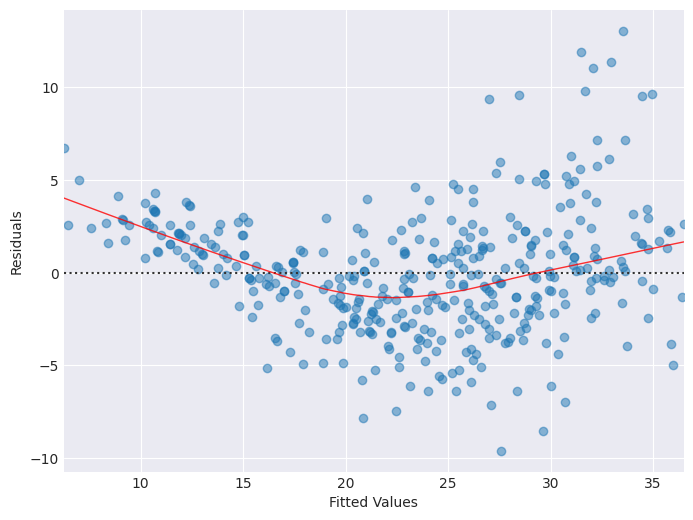

In [23]:
with plt.style.context('seaborn-v0_8-darkgrid'):
    _, ax = plt.subplots(figsize=(8,6))
    ax = sns.residplot(x=results2.fittedvalues,y=y,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    ax.set_xlabel('Fitted Values')
    ax.set_ylabel('Residuals')

In [24]:
h_avg = ((X.shape[1]+1)/X.shape[0])
h_avg

0.02295918367346939

13

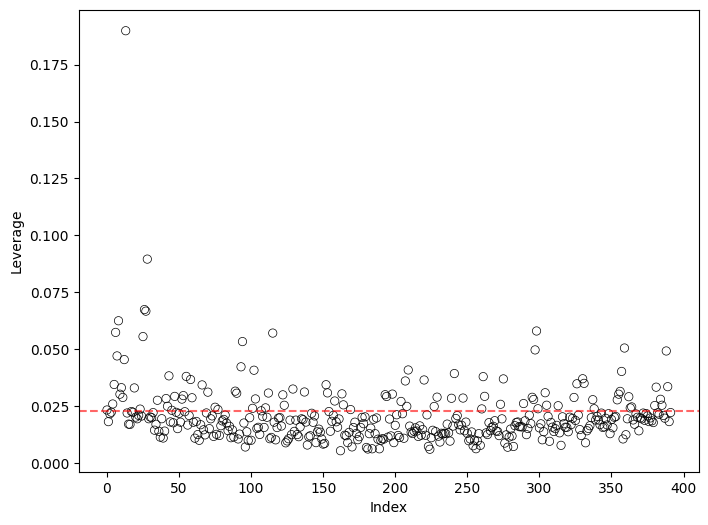

In [25]:
infl = results2.get_influence()
_, ax = plt.subplots(figsize=(8,6))
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag,  marker='o', facecolors='none', edgecolors='black', linewidths=0.5)
ax.axhline(h_avg, ls='--', c='r', alpha=0.6)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [26]:
X.iloc[13]

const              1.0
cylinders          8.0
displacement     455.0
horsepower       225.0
weight          3086.0
acceleration      10.0
year              70.0
origin             1.0
Name: buick estate wagon (sw), dtype: float64

In [27]:
np.arange(X.shape[0])[infl.hat_matrix_diag/h_avg > 3]

array([13, 28])

Points 13 and 28 have a leverage that's more than 3 times the average leverage.

From the residuals plot we can see that the U-shape persists indicating that the true underlying relationship between the predictors and the response isn't linear.

We can also see a few large residuals but they're not unusual due to the difference between the true underlying relationship and the used model.

In the leverage plot we can identify a point with an extremely high leverage that the model would benefit from removing. (the point at index 13)

**(e)** Fit some models with interactions as described in the lab. Do
any interactions appear to be statistically significant?

In [28]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [29]:
y = mpg
X = MS(['cylinders', 'horsepower',
        ('cylinders', 'horsepower')]).fit_transform(auto)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,72.8151,3.071,23.708,0.0
cylinders,-6.4925,0.511,-12.716,0.0
horsepower,-0.4160,0.035,-12.051,0.0
cylinders:horsepower,0.0472,0.005,9.984,0.0


The relationship between `cylinders` and `horsepower` seems to be statistically significant.

**(f)** Try a few different transformations of the variables, such as
$\log(X), \sqrt{X}, X^2$. Comment on your findings.

In [30]:
def test_with_transformation(func_list):
    with sns.axes_style("darkgrid") :
        y = mpg
        X = pd.DataFrame({'horsepower': horsepower})
        
        for func in func_list:
            X[f'{func.__name__} horsepower'] = func(horsepower)
        X = sm.tools.add_constant(X)
        results_tests = sm.OLS(y, X).fit()

        fig, axes = plt.subplots(1, 2, figsize=(13, 6))
        
        full_name = ""
        for func in func_list:
            full_name += f'{func.__name__} '
        fig.suptitle(f'{full_name} Horsepower')
        
        axes[0].scatter(horsepower, mpg, marker='o', facecolors='none', edgecolors='black', linewidths=0.4)
        axes[0].set_xlabel('Horsepower')
        axes[0].set_ylabel('Miles Per Gallon')

        xlim = np.sort(horsepower)[0], np.sort(horsepower)[-1]
        x_pred = np.linspace(xlim[0], xlim[1], 500)
        X_pred = pd.DataFrame({'horsepower':x_pred})
        for func in func_list:
            X_pred[f'{func.__name__} horsepower'] = func(x_pred)
        X_pred = sm.tools.add_constant(X_pred)
        y_pred = results_tests.predict(X_pred)
        
        axes[0].plot(x_pred, y_pred, linewidth=2, color='orange');

        sns.residplot(x=results_tests.fittedvalues, y=y,
                    lowess=True,
                    scatter_kws={'alpha': 0.5},
                    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.5},
                    ax=axes[1])
        axes[1].set_xlabel('Fitted Values')
        axes[1].set_ylabel('Residuals')
        axes[1].axhline(0, ls=':', color='k');
        
        for ax in axes: 
            for spine in ax.spines.values():
                spine.set_visible(True)
                spine.set_linewidth(1)
                spine.set_color('black');
        
        return results_tests.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     416.6
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.98e-97
Time:                        09:33:35   Log-Likelihood:                -1136.8
No. Observations:                 392   AIC:                             2280.
Df Residuals:                     389   BIC:                             2292.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            156.0406     12.083     12.914      0.000     132.285     179.796
horsepower         0.1185      0.029      4.044      0.000       0.061       0.176
log horsepower   -31.5982      3.284     -9.623      0.000     -38.054     -25.142
==============================================================================
Omnibus:                       17.484   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.245
Skew:                           0.162   Prob(JB):                     3.01e-09
Kurtosis:                       4.516   Cond. No.                     6.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

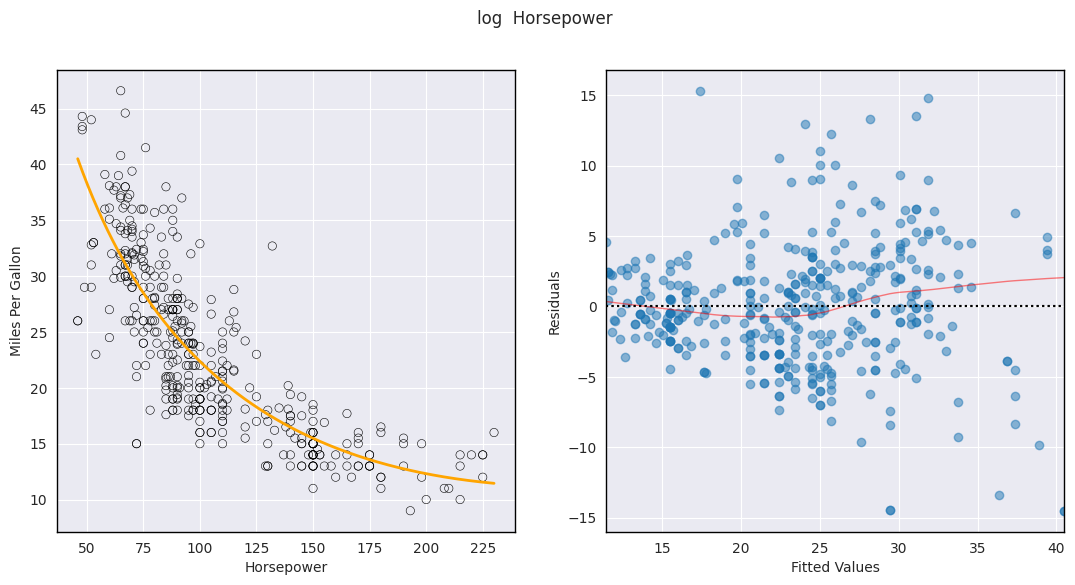

In [31]:
test_with_transformation([np.log])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     287.3
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           3.52e-98
Time:                        09:33:36   Log-Likelihood:                -1131.9
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     388   BIC:                             2288.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -63.8198     70.990     -0.899      0.369    -203.393      75.754
horsepower          1.3467      0.392      3.435      0.001       0.576       2.117
sqrt horsepower   -51.8974     16.518     -3.142      0.002     -84.373     -19.421
log horsepower    102.1959     42.708      2.393      0.017      18.228     186.164
==============================================================================
Omnibus:                       16.657   Durbin-Watson:                   1.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.290
Skew:                           0.233   Prob(JB):                     1.60e-07
Kurtosis:                       4.303   Cond. No.                     4.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

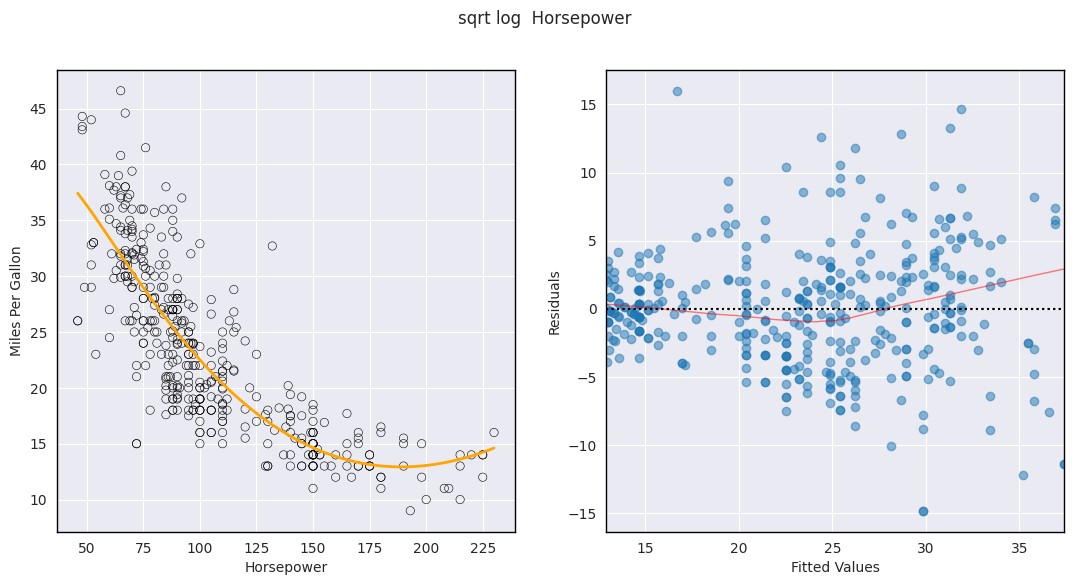

In [32]:
test_with_transformation([np.sqrt, np.log])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.18e-97
Time:                        09:33:36   Log-Likelihood:                -1133.1
No. Observations:                 392   AIC:                             2274.
Df Residuals:                     388   BIC:                             2290.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                65.3559     23.054      2.835      0.005      20.029     110.682
horsepower           -0.3157      0.410     -0.770      0.442      -1.122       0.491
sqrt horsepower      -2.1514      5.848     -0.368      0.713     -13.649       9.346
square horsepower     0.0010      0.001      1.810      0.071   -8.87e-05       0.002
==============================================================================
Omnibus:                       16.449   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.200
Skew:                           0.210   Prob(JB):                     1.02e-07
Kurtosis:                       4.340   Cond. No.                     1.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

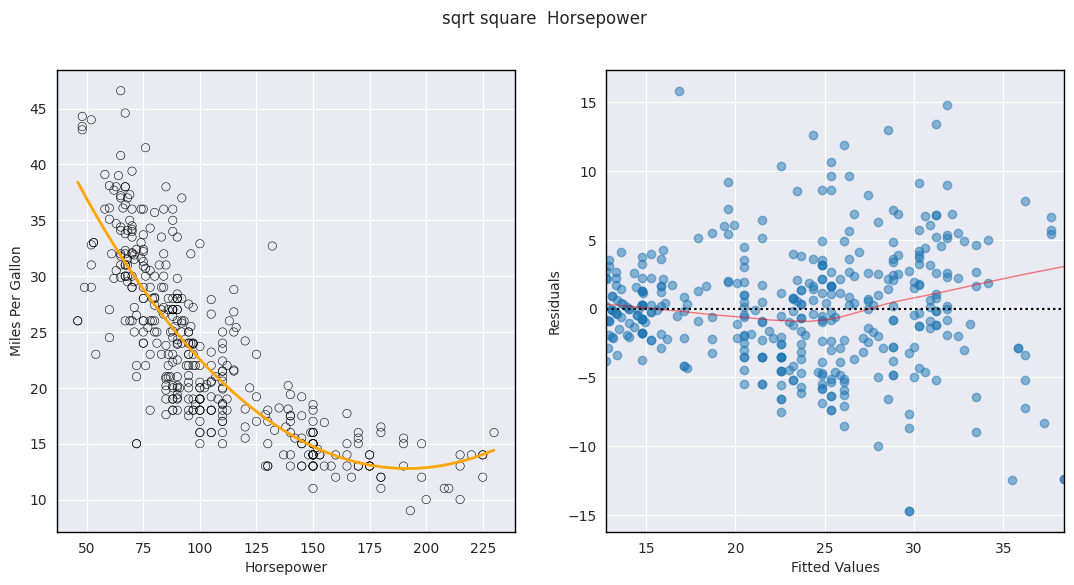

In [33]:
test_with_transformation([np.sqrt, np.square])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.99e-98
Time:                        09:33:36   Log-Likelihood:                -1128.3
No. Observations:                 392   AIC:                             2267.
Df Residuals:                     387   BIC:                             2287.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -683.8915    243.904     -2.804      0.005   -1163.435    -204.348
horsepower           11.6464      3.898      2.988      0.003       3.982      19.311
square horsepower    -0.0074      0.003     -2.655      0.008      -0.013      -0.002
sqrt horsepower    -338.4598    109.153     -3.101      0.002    -553.067    -123.852
log horsepower      651.4691    211.145      3.085      0.002     236.334    1066.605
==============================================================================
Omnibus:                       20.312   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.388
Skew:                           0.302   Prob(JB):                     4.62e-09
Kurtosis:                       4.409   Cond. No.                     2.46e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

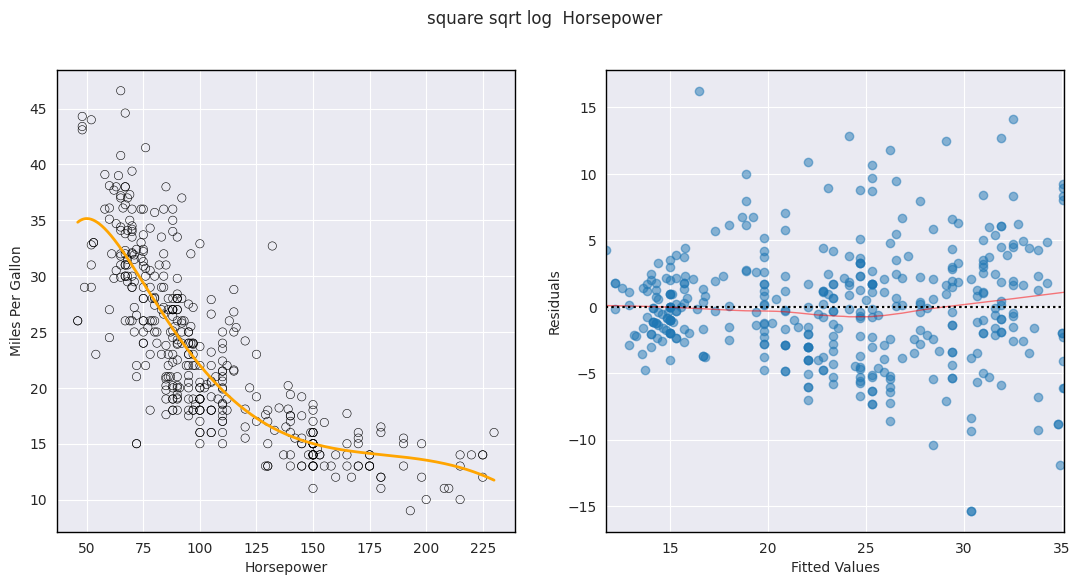

In [34]:
test_with_transformation([np.square, np.sqrt, np.log])

We can see that adding the log term slightly bettered the fit of the model to the data capturing the underlying non-linear relationship a bit better. As we added more terms the U-shape in the residuals plot diminished but heteroscedasticity remained very visible.

The last model with the 3 functions combined seems to be the best fit to the data with the highest $R^2$ value of 0.695 and we can reject the null hypotheses for all coefficients with a 0.01 confidence level meaning that there's very likely a relationship between the response and the predictors when they're together (log sqrt square transformations of horsepower).

### **Q10.**
This question should be answered using the `Carseats` data set.

In [35]:
carseats = load_data('Carseats')
carseats.head() 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [36]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


**(a)** Fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [37]:
y = carseats['Sales']
X = MS(['Price', 'Urban', 'US']).fit_transform(carseats)
results = sm.OLS(y, X).fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


**(b)** Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!



`Price`: for every unit increase in `Price` the `Sales` decreases by -0.0545 (sales here are in thousands so that would be 55 sales less).

`Urban[Yes]`: A dummy variable for the qualitative predictor `Urban`, tells us that a Store in an urban area has -0.0219 less `Sales` though it's not statistically significant.

`US[Yes]`: A dummy variable for the qualitative predictor `US`, tells us that a Store in the US has 1.2006 more `Sales`.

**(c)** Write out the model in equation form, being careful to handle
the qualitative variables properly.

$$
Sales = 13.0435 - 0.0545 \times Price + 1.2006 \times US - 0.0219 \times Urban 
$$

$$
Sales =
\begin{cases}
13.0435 - 0.0545 \times Price + 1.2006 - 0.0219 & \text{If US and Urban} \\
13.0435 - 0.0545 \times Price - 0.0219 & \text{If not US and Urban} \\
13.0435 - 0.0545 \times Price + 1.2006  & \text{If US and not Urban} \\
13.0435 - 0.0545 \times Price   & \text{If not US and not Urban} 
\end{cases}
$$

**(d)** For which of the predictors can you reject the null hypothesis
$H_0 : β_j = 0$?

We can reject the null hypothesis for the `intercept`, `Price` and `US` predictors though we can't reject it for the `Urban` predictor since it has a very high p-value of 0.936.

**(e)** On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

We'll just remove the `Urban` predictor since there's no evidence it's associated with the response.

In [38]:
y = carseats['Sales']
X = MS(['Price', 'US']).fit_transform(carseats)
results_no_urban = sm.OLS(y, X).fit()
summarize(results_no_urban)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


**(f)** How well do the models in (a) and (e) fit the data?

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           2.39e-23
Time:                        09:33:37   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
results_no_urban.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           2.66e-24
Time:                        09:33:37   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
anova_lm(results, results_no_urban)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,396.0,2420.834671,0.0,NaN,NaN,NaN
1,397.0,2420.874462,-1.0,-0.03979,0.006525,NaN


Both models are approximately the same and neither of them is a great fit to the data with $R^2$ scores of 0.239 though we can say that model (e) is better since it accomplishes the same task with one less predictor. 

**(g)** Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).

In [42]:
results_no_urban.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


**(h)** Is there evidence of outliers or high leverage observations in the
model from (e)?

In [43]:
h_avg = ((X.shape[1]+1)/X.shape[0])
h_avg

0.01

42

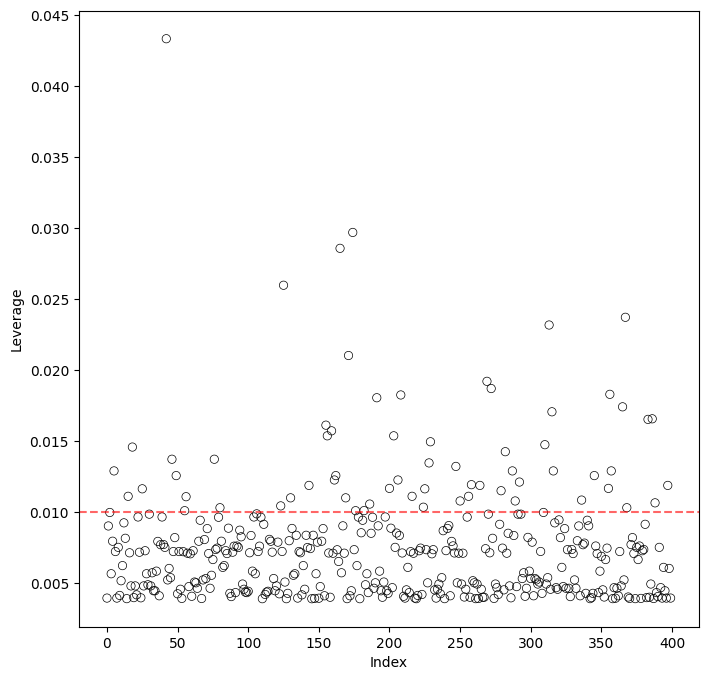

In [44]:
infl = results_no_urban.get_influence()
_, ax = plt.subplots(figsize=(8,8))
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag, marker='o', facecolors='none', edgecolors='black', linewidths=0.5)
ax.axhline(h_avg, ls='--', c='r', alpha=0.6)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [45]:
np.arange(X.shape[0])[infl.hat_matrix_diag/h_avg > 3]

array([42])

In [46]:
infl.hat_matrix_diag[42]/h_avg

4.3337657037178525

The point at index 42 has very high leverage compared to the rest of the data, precisely 4.33 times the average leverage.

In [47]:
X.iloc[42]

intercept     1.0
Price        24.0
US[Yes]       0.0
Name: 42, dtype: float64

In [48]:
X.describe()

,intercept,Price,US[Yes]
count,400.0,400.000000,400.000000
mean,1.0,115.795000,0.645000
std,0.0,23.676664,0.479113
min,1.0,24.000000,0.000000
25%,1.0,100.000000,0.000000
50%,1.0,117.000000,1.000000
75%,1.0,131.000000,1.000000
max,1.0,191.000000,1.000000


It also happens to be the point with the minimum price.

### **Q11.**
In this problem we will investigate the t-statistic for the null hypoth-
esis H0 : β = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.

In [49]:
rng = np.random.default_rng (1)
x = rng.normal(size =100)
y = 2 * x + rng.normal(size =100)

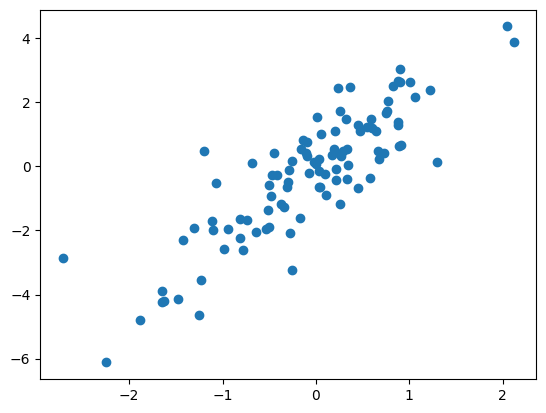

In [50]:
plt.scatter(x, y);

**(a)** Perform a simple linear regression of `y` onto `x`, without an intercept. Report the coefficient estimate $\hat\beta$, the standard error of
this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis $H_0 : \beta = 0$. Comment on these
results. (You can perform regression without an intercept using
the keywords argument `intercept=False` to `ModelSpec()`.

In [51]:
df = pd.DataFrame({'x': x, 'y':y})
X = MS('x', intercept=False).fit_transform(df)
results = sm.OLS(y, X).fit()
summarize(results)

,coef,std err,t,P>|t|
x,1.9762,0.117,16.898,0.0


The value for the coefficient $\hat\beta$ we got is pretty close to 2 which is the number we multiplied by `x` to get `y`. The relationship between `x` and `y` is statistically significant.

**(b)** Now perform a simple linear regression of `x` onto `y` without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis $H_0 : \beta = 0$. Comment on these results.

In [52]:
df = pd.DataFrame({'x': x, 'y':y})
Y = MS('y', intercept=False).fit_transform(df)
results = sm.OLS(x, Y).fit()
summarize(results)

,coef,std err,t,P>|t|
y,0.3757,0.022,16.898,0.0


Naturally there's a relationship and it's also statistically significant.

**(c)** What is the relationship between the results obtained in (a) and (b)?

They have the same exact t-statistic.

And I think they should be reciprocals of eachother but the other regression coefficient was very badly affected by noise which let it get pretty far from 0.5. 

This is a better and more naunced answer 

https://botlnec.github.io/islp/sols/chapter3/exercise11/#c

**(d)** Check the book for the full question but the jist of it is:

Given that:
$$
\hat\beta = (\sum_{i=1}^{n} x_i y_i) / (\sum_{i'=1}^{n} x_{i'}^2)\\
$$
$$
SE(\hat\beta) = \sqrt{\frac{\sum_{i=1}^{n} (y_i  - x_i \hat\beta) ^ 2}{(n - 1) \sum_{i'=1}^{n} x_{i'}^2}}
$$

Prove that:
$$
\hat\beta / SE(\hat\beta) = \frac{\sqrt{n-1} \sum_{i=1}^{n} x_i y_i}{\sqrt{(\sum_{i=1}^{n} x_i^2) (\sum_{i'=1}^{n} y_{i'}^2) - (\sum_{i'=1}^{n} x_{i'} y_{i'}) ^ 2}}
$$

#### **Solution:**

Dividing both sides:

$$
\hat\beta / SE(\hat\beta) = \frac{\sqrt{n - 1} \sqrt{\sum_{i'=1}^{n} x_{i'}^2} \sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} x_{i'}^2 \sqrt{\sum_{i=1}^{n} (y_i  - x_i \hat\beta)^2}}
$$


Substituting for $\hat\beta$ and factoring out $\sqrt{\sum_{i'=1}^{n} x_{i'}^2}$ from the numerator and denominator:


$$
\hat\beta / SE(\hat\beta) = \frac{\sqrt{n - 1} \sum_{i=1}^{n} x_i y_i}{\sqrt{\sum_{i'=1}^{n} x_{i'}^2} \sqrt{\sum_{i=1}^{n} (y_i  - x_i \frac{\sum_{j=1}^{n} x_j y_j}{\sum_{i'=1}^{n} x_{i'}^2})^2}}
$$

By expanding the squared difference:
$$
\hat\beta / SE(\hat\beta) = \frac{\sqrt{n - 1} \sum_{i=1}^{n} x_i y_i}{\sqrt{\sum_{i'=1}^{n} x_{i'}^2} \sqrt{\sum_{i=1}^{n} (y_i^2 - 2 y_i x_i \frac{\sum_{j=1}^{n} x_j y_j}{\sum_{i'=1}^{n} x_{i'}^2} + (x_i \frac{\sum_{j=1}^{n} x_j y_j}{\sum_{i'=1}^{n} x_{i'}^2})^2) }}
$$


And simplifying:
$$
\hat\beta / SE(\hat\beta) = \frac{\sqrt{n - 1} \sum_{i=1}^{n} x_i y_i}{\sqrt{\sum_{i=1}^{n} \sum_{i'=1}^{n} x_{i'}^2 y_i^2 - 2 \sum_{i=1}^{n} y_i x_i \sum_{j=1}^{n} x_j y_j + (\sum_{j=1}^{n} x_j y_j)^2}}
$$

$$
\hat\beta / SE(\hat\beta) = \frac{\sqrt{n - 1} \sum_{i=1}^{n} x_i y_i}{\sqrt{\sum_{i=1}^{n} \sum_{i'=1}^{n} x_{i'}^2 y_i^2 - 2 (\sum_{j=1}^{n} x_j y_j)^2 + (\sum_{j=1}^{n} x_j y_j)^2}}
$$

$$
\hat\beta / SE(\hat\beta) = \frac{\sqrt{n - 1} \sum_{i=1}^{n} x_i y_i}{\sqrt{(\sum_{i=1}^{n} x_{i'}^2) (\sum_{i'=1}^{n} y_i^2) - (\sum_{j=1}^{n} x_j y_j)^2 }}
$$


Which is what we set out to prove. 

All that's left is confirming that the t-statistic can be calculated using that formula numerically.

In [53]:
def t(x, y):
    n = x.shape[0]
    numerator = np.sqrt(n - 1) * np.sum(x * y)
    denominator = np.sqrt(np.sum(x**2) * np.sum(y**2) - (np.sum(x * y))**2)
    return numerator/denominator 

In [54]:
t(x, y), results.tvalues

(16.898417063035094,
 y    16.898417
 dtype: float64)

Which is exactly the same as the value returned from the fitted results summary earlier.

**(e)** Using the results from (d), argue that the t-statistic for the regression of `y onto x` is the same as the t-statistic for the regression of `x onto y`.


 Simply substituing x with y and y with x we can see that the formula remains exactly the same.

We can also try that numerically too.

In [55]:
t(y, x)

16.898417063035094

**(f)** Show that when regression is performed with an intercept, the t-statistic for $H_0 : \beta_1 = 0$ is the same for the regression of `y`
onto `x` as it is for the regression of `x` onto `y`.

In [56]:
df = pd.DataFrame({'x': x, 'y':y})
X = MS('x').fit_transform(df)
results = sm.OLS(y, X).fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-0.0760,0.101,-0.756,0.451
x,1.9686,0.118,16.734,0.000


In [57]:
df = pd.DataFrame({'x': x, 'y':y})
Y = MS('y').fit_transform(df)
results = sm.OLS(x, Y).fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,0.0095,0.044,0.216,0.829
y,0.3763,0.022,16.734,0.000


As we can see the t-statistic for $H_0 : \beta_1 = 0$ is 16.734 for both regressions `y onto x` and `x onto y`.

### **Q12.**
This problem involves simple linear regression without an intercept

**(a)** Recall that the coefficient estimate $\hat\beta$ for the linear regression of
Y onto X without an intercept is given by (3.38). Under what
circumstance is the coefficient estimate for the regression of `X
onto Y` the same as the coefficient estimate for the regression of
`Y onto X`?

When they have the same variance or one of them is a permutation of the other.

**(b)** Generate an example in `Python` with n = 100 observations in which the coefficient estimate for the regression of `X onto Y` is different from the coefficient estimate for the regression of `Y onto X`.

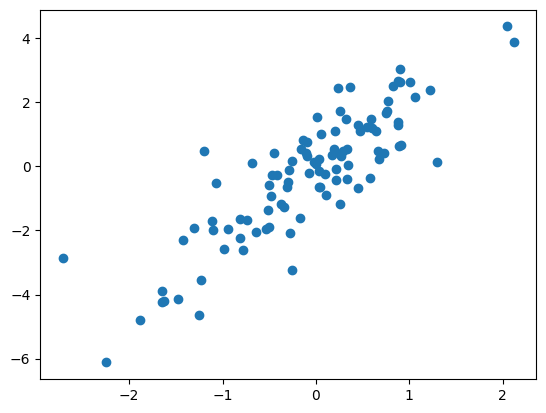

In [58]:
rng = np.random.default_rng(1)
x = rng.normal(size =100)
y = 2 * x + rng.normal(size =100)
plt.scatter(x, y);

In [59]:
df = pd.DataFrame({'x': x, 'y':y})
X = MS('x', intercept=False).fit_transform(df)
results = sm.OLS(y, X).fit()
summarize(results)

,coef,std err,t,P>|t|
x,1.9762,0.117,16.898,0.0


In [60]:
df = pd.DataFrame({'x': x, 'y':y})
Y = MS('y', intercept=False).fit_transform(df)
results = sm.OLS(x, Y).fit()
summarize(results)

,coef,std err,t,P>|t|
y,0.3757,0.022,16.898,0.0


**(c)** Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of `X onto Y` is the same as the coefficient estimate for the regression of `Y onto X`.

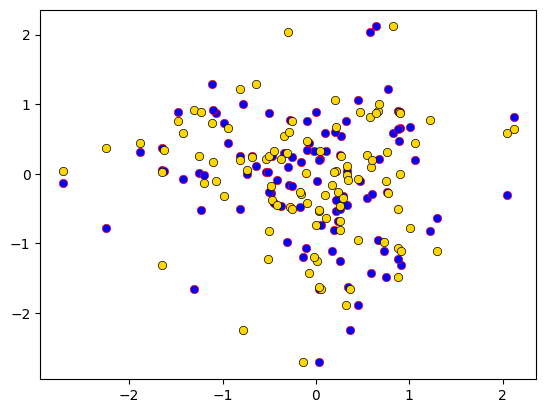

In [61]:
rng = np.random.default_rng(1)
x = rng.normal(size =100)
y = rng.permutation(x)
plt.scatter(x, y,  marker='o', facecolors='blue', edgecolors='red', linewidths=0.5);
plt.scatter(y, x,  marker='o', facecolors='gold', edgecolors='black', linewidths=0.5);

In [62]:
df = pd.DataFrame({'x': x, 'y':y})
X = MS('x', intercept=False).fit_transform(df)
results = sm.OLS(y, X).fit()
summarize(results)

,coef,std err,t,P>|t|
x,-0.0565,0.1,-0.563,0.575


In [63]:
df = pd.DataFrame({'x': x, 'y':y})
Y = MS('y', intercept=False).fit_transform(df)
results = sm.OLS(x, Y).fit()
summarize(results)

,coef,std err,t,P>|t|
y,-0.0565,0.1,-0.563,0.575


### **Q13.**

In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to use the default random
number generator with seed set to 1 prior to starting part (a) to
ensure consistent results.

**(a)** Using the `normal()` method of your random number generator, create a vector, `x`, containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, X.

In [64]:
rng = np.random.default_rng(1)
x = rng.normal(0, 1, size=100)

**(b)** Using the `normal()` method, create a vector, `eps`, containing 100 observations drawn from a $N(0, 0.25)$ distribution—a normal distribution with mean zero and variance 0.25.

In [65]:
eps = rng.normal(0, 0.25, size=100)

**(c)** Using `x` and `eps`, generate a vector `y` according to the model
$$
Y = -1 + 0.5X + \epsilon
$$
What is the length of the vector `y` ? What are the values of $\beta_0$
and $\beta_1$ in this linear model?

In [66]:
y = -1 + 0.5 * x + eps
y.shape

(100,)

The length of `y` is 100. $\beta_0 = -1$ and $\beta_1 = 0.5$.

**(d)** Create a scatterplot displaying the relationship between `x` and
`y`. Comment on what you observe.

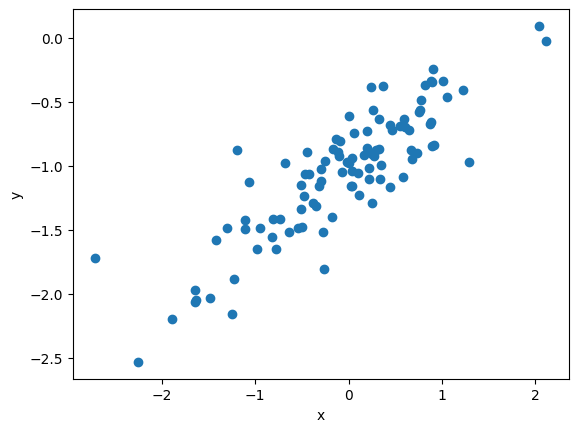

In [67]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

There's a very obvious linear relationship between `x` and `y`. You can also roughly make out the position of the intercept to be at -1.

**(e)** Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat\beta_0$ and $\hat\beta_1$ compare to $\beta_0$ and $\beta_1$?

In [68]:
df = pd.DataFrame({'x': x, 'y':y})
X = MS('x').fit_transform(df)
results = sm.OLS(y, X).fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-1.0190,0.025,-40.537,0.0
x,0.4921,0.029,16.734,0.0


The predicted coefficients are very close to the true coefficients.

**(f)** Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend

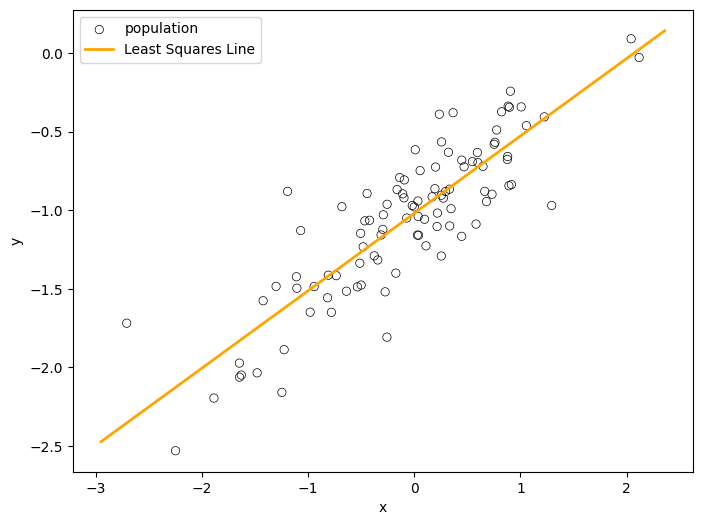

In [69]:
_, ax = plt.subplots(figsize=(8,6))
ax.scatter(x, y, marker='o', facecolors='none', edgecolors='black', linewidths=0.5, label='population')
ax.set_xlabel('x')
ax.set_ylabel('y')

intercept, slope = results.params
xlim = ax.get_xlim()
ylim = [intercept + xlim[0] * slope, intercept + xlim[1] * slope]
ax.plot(xlim, ylim, linewidth=2, color='orange', label='Least Squares Line')
ax.legend();

**(g)** Now fit a polynomial regression model that predicts `y` using `x` and $x^2$ . Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [70]:
X = MS([poly('x', degree=2)]).fit_transform(df)
results_poly = sm.OLS(y, X).fit()
summarize(results_poly)

,coef,std err,t,P>|t|
intercept,-1.0552,0.025,-41.920,0.000
"poly(x, degree=2)[0]",4.1909,0.252,16.649,0.000
"poly(x, degree=2)[1]",-0.0131,0.252,-0.052,0.959


We can see that the p-value for the quadratic term is 0.959 which is extremely high, indicating that we cannot reject the null hypothesis here hence we have no reason to believe that the quadratic term improves the model fit.

**(h)** Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

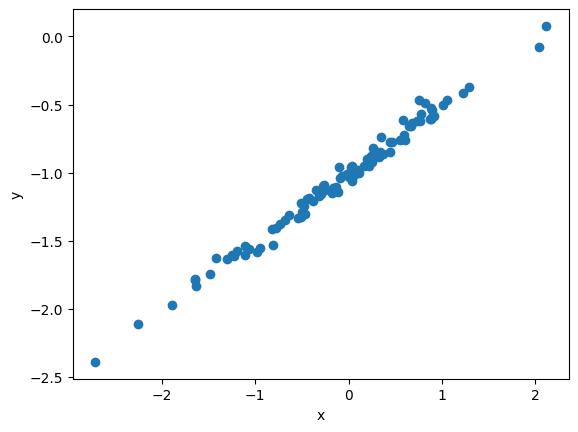

In [71]:
# (h) and (i_ could be done using a function to save space but I noticed 
# that pretty late  because I messed up the order and had to reorder them later

eps = rng.normal(0, 0.05, size=100)
y = -1 + 0.5 * x + eps
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

In [72]:
df = pd.DataFrame({'x': x, 'y':y})
X = MS('x').fit_transform(df)
less_noisy = sm.OLS(y, X).fit()
summarize(less_noisy)

,coef,std err,t,P>|t|
intercept,-1.0081,0.005,-217.791,0.0
x,0.4994,0.005,92.211,0.0


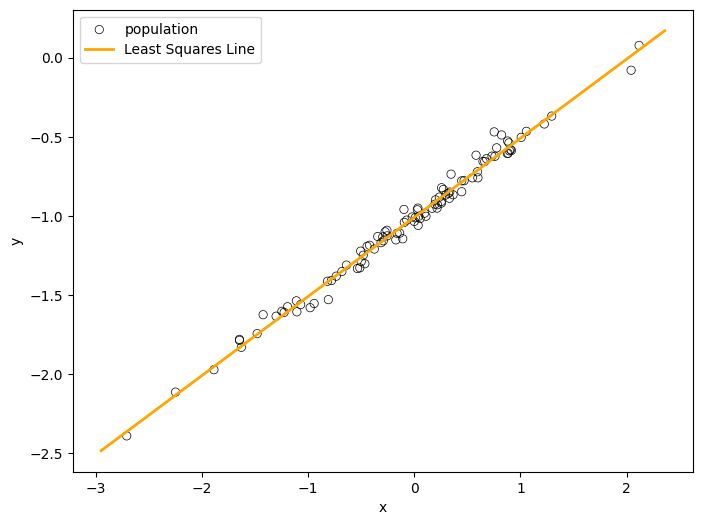

In [73]:
_, ax = plt.subplots(figsize=(8,6))
ax.scatter(x, y, marker='o', facecolors='none', edgecolors='black', linewidths=0.5, label='population')
ax.set_xlabel('x')
ax.set_ylabel('y')

intercept, slope = less_noisy.params
xlim = ax.get_xlim()
ylim = [intercept + xlim[0] * slope, intercept + xlim[1] * slope]
ax.plot(xlim, ylim, linewidth=2, color='orange', label='Least Squares Line')
ax.legend();

We can see that the predicted coefficients are even closer to their true values now that there's less noise in the data and standard error is very miniscule.

**(i)** Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

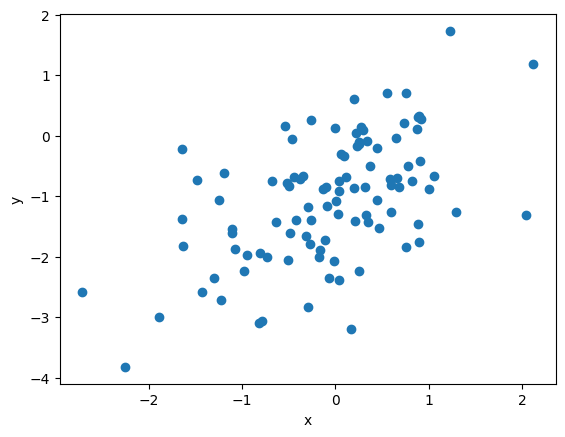

In [74]:
eps = rng.normal(0, 1, size=100)
y = -1 + 0.5 * x + eps
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

In [75]:
df = pd.DataFrame({'x': x, 'y':y})
X = MS('x').fit_transform(df)
noisy = sm.OLS(y, X).fit()
summarize(noisy)

,coef,std err,t,P>|t|
intercept,-1.0092,0.087,-11.539,0.0
x,0.6470,0.102,6.323,0.0


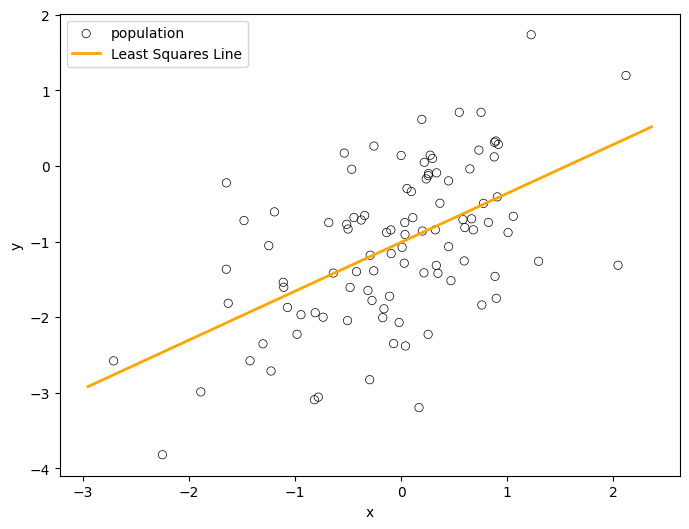

In [76]:
_, ax = plt.subplots(figsize=(8,6))
ax.scatter(x, y, marker='o', facecolors='none', edgecolors='black', linewidths=0.5, label='population')
ax.set_xlabel('x')
ax.set_ylabel('y')

intercept, slope = noisy.params
xlim = ax.get_xlim()
ylim = [intercept + xlim[0] * slope, intercept + xlim[1] * slope]
ax.plot(xlim, ylim, linewidth=2, color='orange', label='Least Squares Line')
ax.legend();

We can see that the predicted coefficients are even farther from their true values now that there's more noise in the data and standard error is much bigger than before.

**(j)** What are the confidence intervals for β 0 and β 1 based on the original data set, the noisier data set, and the less noisy dataset? Comment on your results.

In [77]:
results.conf_int(alpha=0.05)

,0,1
intercept,-1.068891,-0.969122
x,0.433783,0.550508


In [78]:
less_noisy.conf_int(alpha=0.05)

,0,1
intercept,-1.017282,-0.998911
x,0.488614,0.510108


In [79]:
noisy.conf_int(alpha=0.05)

,0,1
intercept,-1.182711,-0.835607
x,0.443946,0.850043


We can see that the noisier the data set the wider the confidence interval it has which makes sense since standard error increases with noise and confidence intervals are calculated using the following approximation:
$$
\hat\beta \pm 2 \cdot SE(\hat\beta)
$$

### **Q14.**
This problem focuses on the collinearity problem.

**(a)** Perform the following commands in `Python`.

In [80]:
rng = np.random.default_rng (10)
x1 = rng.uniform(0, 1, size =100)
x2 = 0.5 * x1 + rng.normal(size =100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size =100)

The last line corresponds to creating a linear model in which `y` is
a function of `x1` and `x2`. Write out the form of the linear model.
What are the regression coefficients?

The linear model takes this form:
$$

Y = 2 + 2 X_1 + 0.3 X_2 + \epsilon \\

$$
and the coefficients are:
$$
\beta_0 = 2 \\
\beta_1 = 2 \\
\beta_2 = 0.3
$$

**(b)** What is the correlation between `x1` and `x2`? Create a scatterplot
displaying the relationship between the variables

In [81]:
np.corrcoef(x1, x2)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

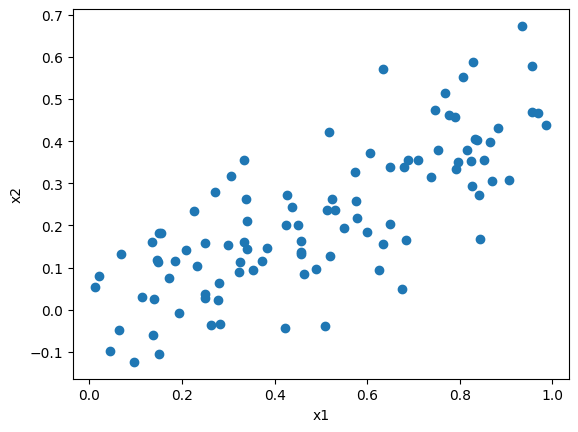

In [82]:
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2');

**(c)** Using this data, fit a least squares regression to predict `y` using `x1` and `x2`. Describe the results obtained. What are $\hat\beta_0$, $\hat\beta_1$, and $\hat\beta_2$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H_0 : \beta_1 = 0$? How about the null hypothesis $H_0 : \beta_2 = 0$?

In [83]:
df = pd.DataFrame({'x1': x1, 'x2':x2, 'y':y})
X = MS(['x1', 'x2']).fit_transform(df)
results = sm.OLS(y, X).fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


The predicted coefficient values are:
$$
\hat\beta_0 = 1.9579 \\
\hat\beta_1 = 1.6154 \\
\hat\beta_2 = 0.9428
$$
The predicted coefficient for the intercept is pretty close to the real value however the other predicted coefficients happen to fall pretty far from their real values.

We can reject the null hypothesis $H_0 : \beta_1 = 0$ because of its small p-value but fail to reject $H_0 : \beta_2 = 0$ because its p-value isn't statistically significant at 0.259.

**(d)** Now fit a least squares regression to predict y using only `x1`. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [84]:
df = pd.DataFrame({'x1': x1, 'x2':x2, 'y':y})
X = MS(['x1']).fit_transform(df)
results = sm.OLS(y, X).fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


The predicted coefficient values are closer to their true values. Yes we can reject the null hypothesis $H_0 : \beta_1 = 0$ due to the low associated p-value.

**(e)** Now fit a least squares regression to predict y using only `x2`. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [85]:
df = pd.DataFrame({'x1': x1, 'x2':x2, 'y':y})
X = MS(['x2']).fit_transform(df)
results = sm.OLS(y, X).fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


There's a considerable difference between the predicted coefficients and thier true values. Though we can reject the null hypothesis $H_0 : \beta_1 = 0$ here because the p-value is pretty small. 

**(f)** Do the results obtained in (c)–(e) contradict each other? Explain your answer.



They don't because in the presence of `x1` the variable `x2` has less explanatory power due to it being a function of `x1` which is the reason we failed to reject the null then. 

However while fitting `y` on `x2` in the absence of `x1`, the relationship between them is the only thing the model can rely on to fit the data and there's clearly a strong relationship hence it'd result in us rejecting the null (low p-value).   

This is also the model written in terms of either variable which shows us that the coefficients values are when fitted seperately are reasonable.
$$
Y = 2 + 2.15 X_1 + 1.03 \epsilon \\

Y = 2 + 4.3 X_2 + 0.6 \epsilon 
$$

**(g)** Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function `np.concatenate` to add this additional observation to each of `x1`, `x2` and `y`.

In [86]:
x1 = np.concatenate ([x1 , [0.1]])
x2 = np.concatenate ([x2 , [0.8]])
y = np.concatenate ([y, [6]])

Re-fit the linear models from (c) to (e) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

In [87]:
def fit_and_diagplot(predictor_list):
    with sns.axes_style("darkgrid") :
        df = pd.DataFrame({'x1': x1, 'x2':x2, 'y':y})
        X = MS(predictor_list).fit_transform(df)
        results = sm.OLS(y, X).fit()
        
        fig, axes = plt.subplots(1, 2, figsize=(13, 6))
        
        full_name = ','.join(predictor_list)
        fig.suptitle(f'y onto {full_name}')
        
        # plot the new outlier point
        outlier_index = 100
        axes[0].scatter(results.fittedvalues[outlier_index], results.resid[outlier_index], c='r', alpha=1)
        
        sns.residplot(x=results.fittedvalues, y=y,
                    lowess=True,
                    scatter_kws={'alpha': 0.5},
                    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.5},
                    ax=axes[0])
        axes[0].set_xlabel('Fitted Values')
        axes[0].set_ylabel('Residuals')
        axes[0].axhline(0, ls=':', color='k');
        
        
        infl = results.get_influence()
        
        axes[1].scatter(np.arange(X.shape[0])[outlier_index], infl.hat_matrix_diag[outlier_index], c='r', alpha=1)
        
        axes[1].scatter(np.arange(X.shape[0]), infl.hat_matrix_diag, marker='o', facecolors='none', edgecolors='black', linewidths=0.5)
        
        h_avg = ((X.shape[1]+1)/X.shape[0])
        axes[1].axhline(h_avg, ls='--', c='r', alpha=0.6, label='Average Leverage')
        axes[1].set_xlabel('Index')
        axes[1].set_ylabel('Leverage')
        axes[1].legend()
        print(f'Index of highest leverage point: {np.argmax(infl.hat_matrix_diag)}')
        print(f'Value of highest leverage point: {X.iloc[np.argmax(infl.hat_matrix_diag)]}')
        
        for ax in axes: 
            for spine in ax.spines.values():
                spine.set_visible(True)
                spine.set_linewidth(1)
                spine.set_color('black');
        
        
        return summarize(results)

Index of highest leverage point: 100
Value of highest leverage point: intercept    1.0
x1           0.1
x2           0.8
Name: 100, dtype: float64


,coef,std err,t,P>|t|
intercept,2.0618,0.192,10.720,0.000
x1,0.8575,0.466,1.838,0.069
x2,2.2663,0.705,3.216,0.002


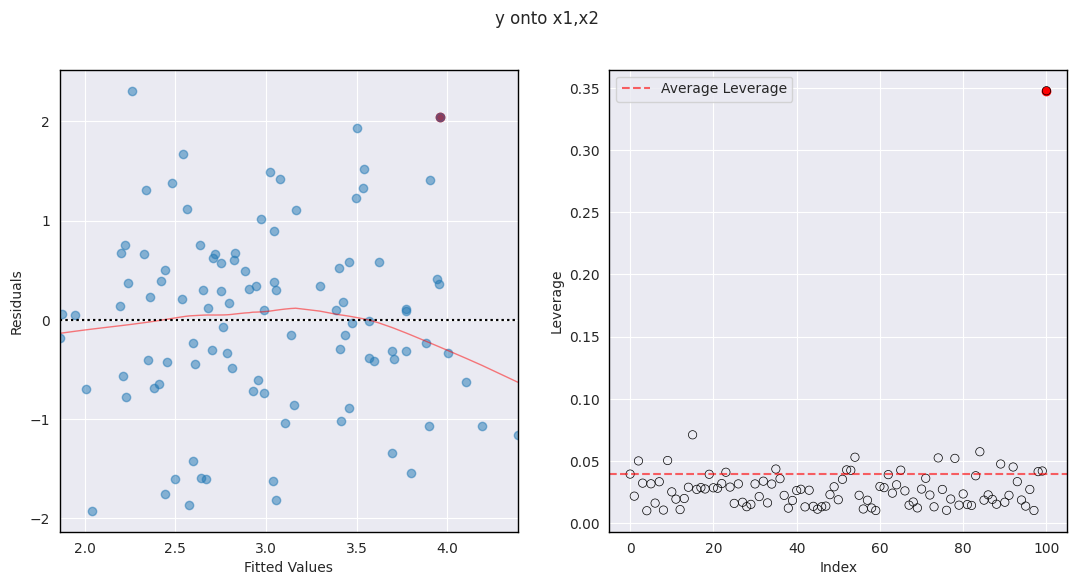

In [88]:
# Model (c)
fit_and_diagplot(['x1', 'x2'])

Index of highest leverage point: 52
Value of highest leverage point: intercept    1.000000
x1           0.987124
Name: 52, dtype: float64


,coef,std err,t,P>|t|
intercept,2.0739,0.201,10.310,0.0
x1,1.8760,0.358,5.236,0.0


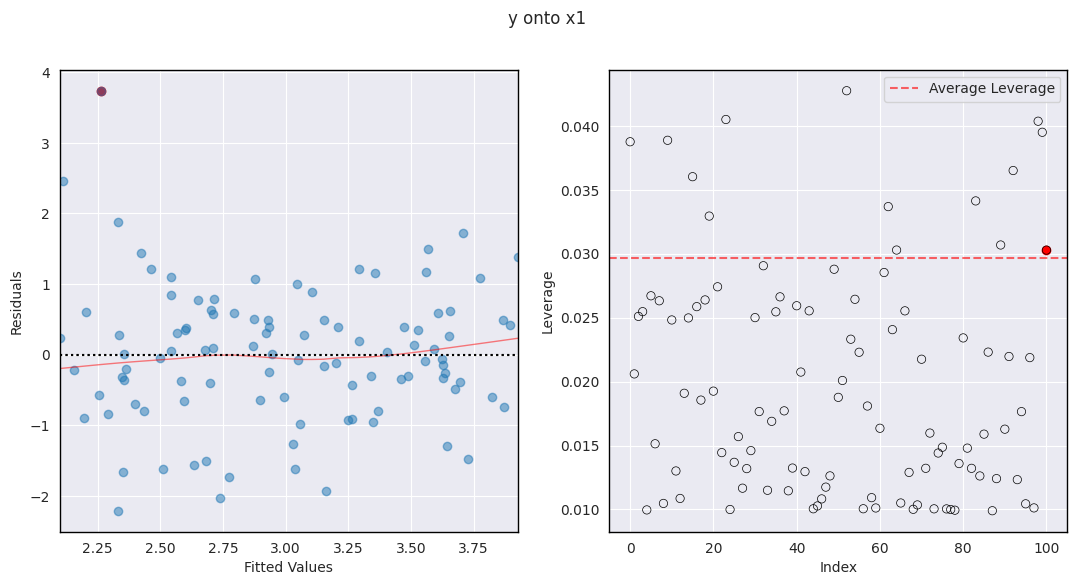

In [89]:
# Model (d)
fit_and_diagplot(['x1'])

Index of highest leverage point: 100
Value of highest leverage point: intercept    1.0
x2           0.8
Name: 100, dtype: float64


,coef,std err,t,P>|t|
intercept,2.2840,0.151,15.088,0.0
x2,3.1458,0.524,6.008,0.0


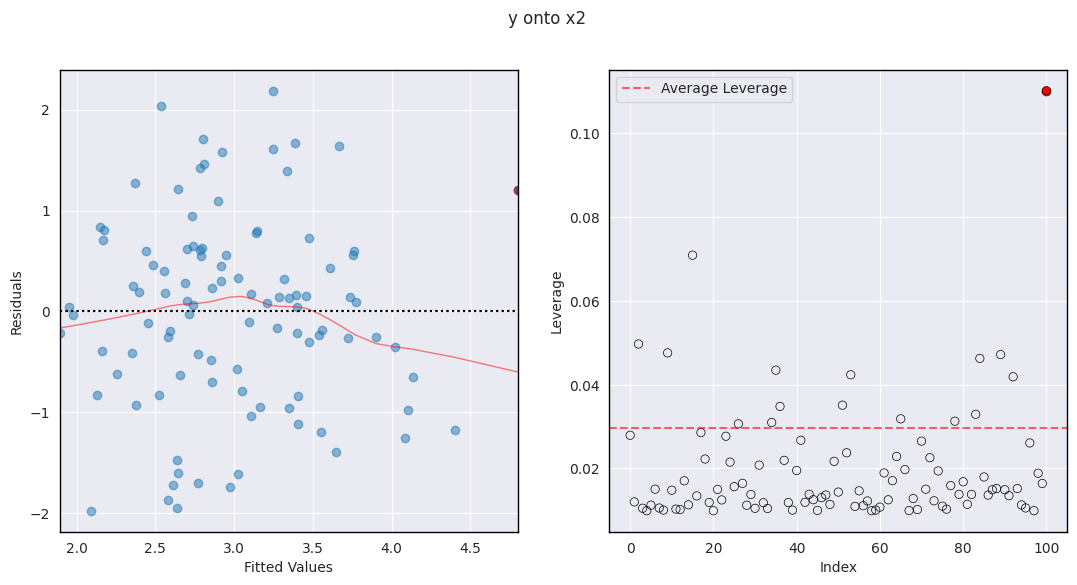

In [90]:
# Model (e)
fit_and_diagplot(['x2'])

I plotted the new added point in red to highlight it.

#### Model (c) `y` onto `x1` and `x2`:

We can see that the hypothesis $H_0: \beta_1 = 0$ is no longer statistically significant at any conventional confidence level and $H_0: \beta_2 = 0$ became statistically significant after adding that point. And comparing the new and old coefficients we can tell that the new $\beta_1$ is much less than the old one but the opposite is true for $\beta_2$.

We can also see from the residuals and leverage plots that this point isn't necessarily an outlier however it has extremely high leverage which is why it heavily affected our model.

#### Model (d) `y` onto `x1`:

Not much changed with this model. Looking at the residuals and leverage plots we can see that the point is a potential outlier since it has the highest residual but it also has very average leverage here.


#### Model (e) `y` onto `x2`:

We can see a slight increase in the coefficients but no notable changes there. Looking at the residuals and leverage plots we can see that the point isn't an outlier but has a very high leverage.

### **Q15.**
This problem involves the `Boston` data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

*Note: I kinda gave up here just tried to get this question over with*

**(a)** For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [91]:
boston = load_data('Boston')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [92]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


             coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0

             coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000

             coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209

              coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0

              coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0

             coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0

             coef  std err       t  P>|t|
intercept  9.4993    0.730  13.006    0.0
dis       -1.5509    0.168  -9.213    0.0

             coef  std err       t  P>|t|
intercept -2.2872    0.443  -5.157    0.0
rad        0.6179    0.034  17.99

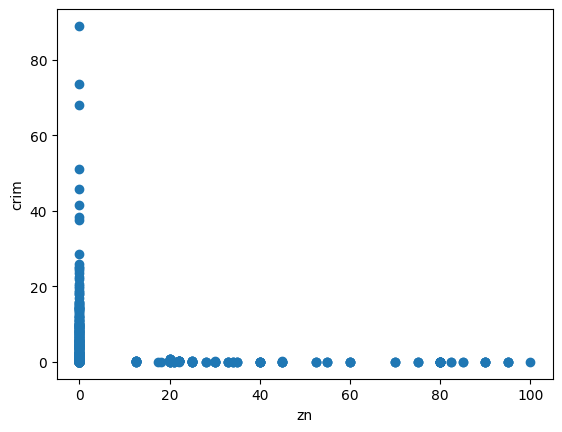

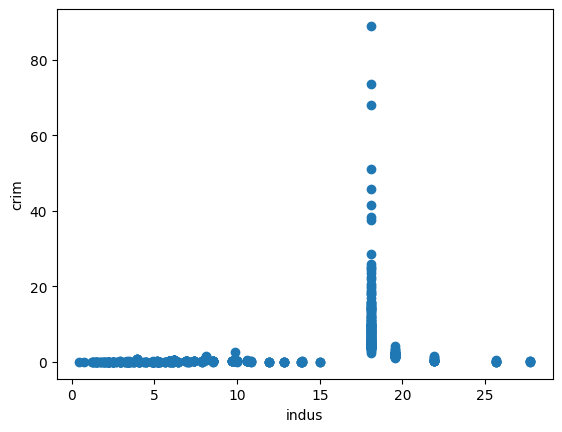

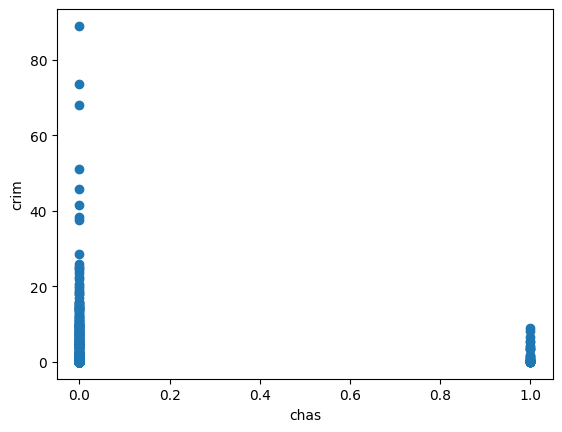

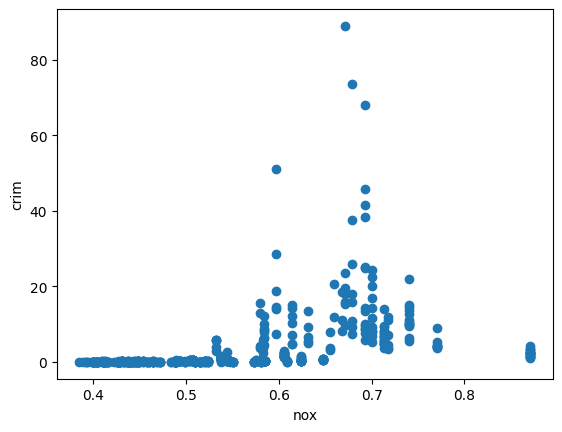

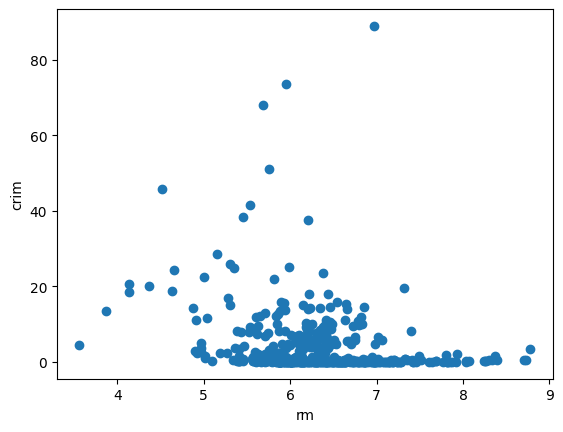

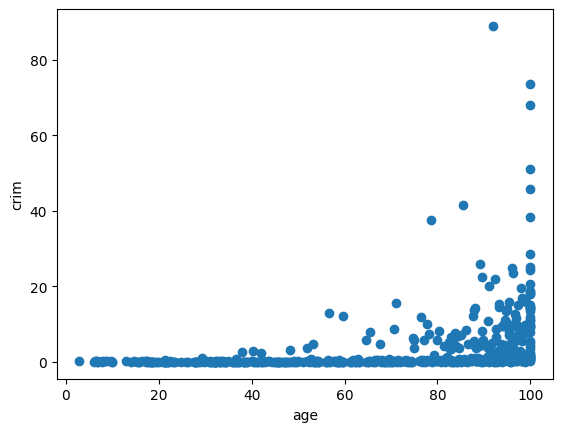

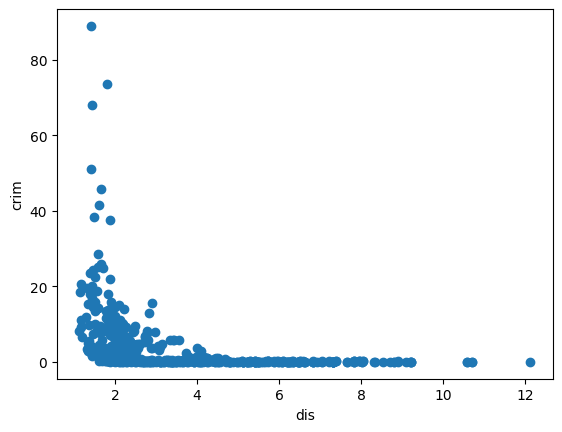

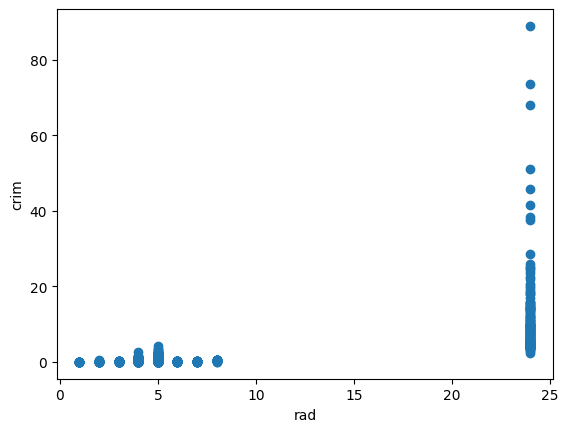

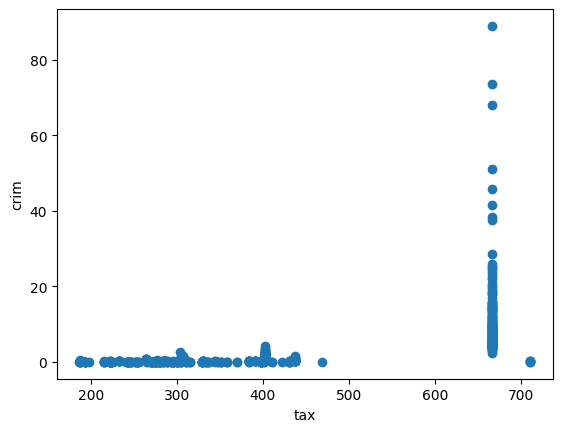

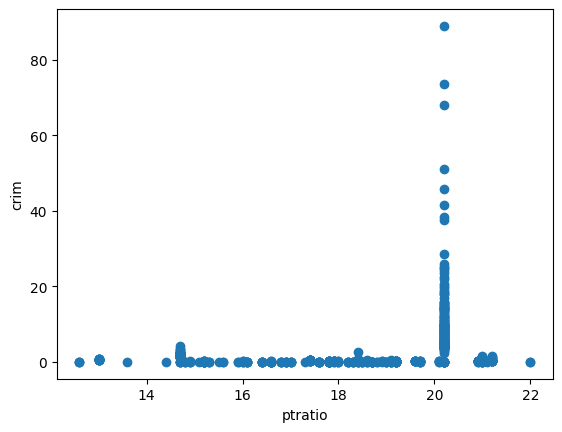

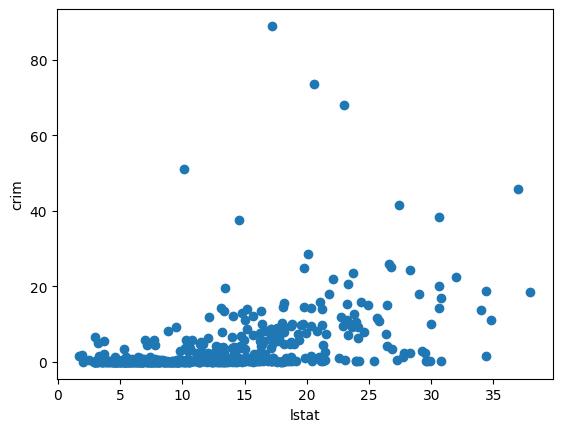

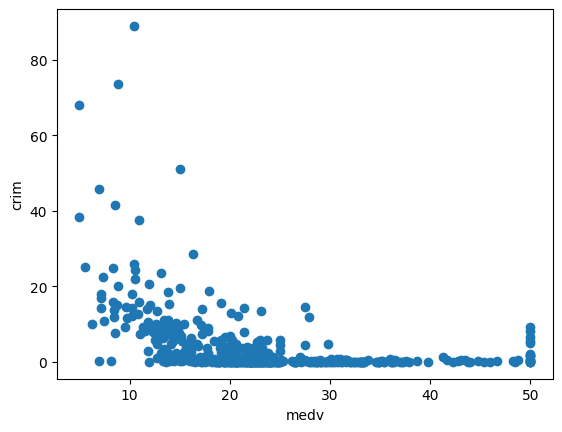

In [93]:
y = boston['crim']
predictors = boston.columns.drop('crim')

coefficients_univariate = []
for predictor in predictors:
    X = MS([predictor]).fit_transform(boston)
    results = sm.OLS(y, X).fit()
    coefficients_univariate.append(results.params.iloc[1])
    print(summarize(results))
    plt.figure()
    plt.scatter(boston[predictor], y)
    plt.xlabel(predictor)
    plt.ylabel('crim')
    print()

Looking at the p-values the relationships between each of the predictors and the response `crim`, in the absence of others is statistically significant apart from `chas` which has a p-value of 0.209

In [94]:
coefficients_univariate

[-0.07393497740412348,
 0.5097763311042313,
 -1.8927765508037608,
 31.248531201122923,
 -2.684051224113948,
 0.10778622713953308,
 -1.5509016824100994,
 0.6179109273272014,
 0.029742252822765353,
 1.1519827870705868,
 0.5488047820623981,
 -0.363159922257603]

**(b)** Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis $H_0 : \beta_j = 0$?

In [95]:
y = boston['crim']
X = MS(predictors).fit_transform(boston)
results = sm.OLS(y, X).fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


We can reject the null hypothesis for `rad`, `medv`, `dis` at a 0.1% confidence level, and `zn` at a 5% confidence level. We fail to reject it for the rest of the predictors though.

**(c)** How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the $x$-axis, and the multiple regression coefficients from (b) on the $y$-axis. That is, each predictor is displayed as asingle point in the plot. Its coefficient in a simple linear regression model is shown on the $x$-axis, and its coefficient estimate in the multiple linear regression model is shown on the $y$-axis.

The results varied greatly, for the univariate regressions we rejected all the null hypotheses apart from one, however for the multiple regression we rejected only 4 and failed to reject the rest.

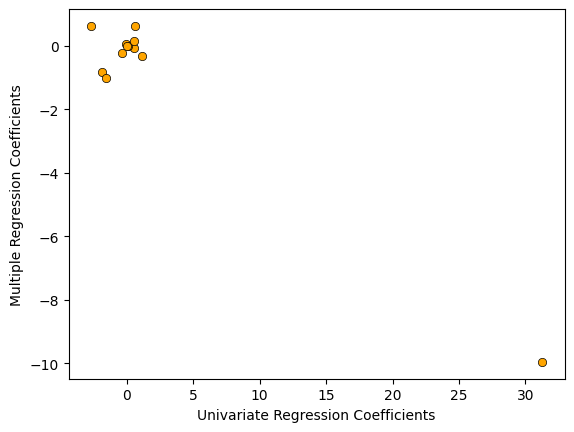

In [96]:
plt.scatter(coefficients_univariate, results.params.iloc[1:], marker='o', facecolors='orange', edgecolors='black', linewidths=0.5);
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients');

It's also interesting to note that the coefficients for `nox` were extremely high in both cases but of opposite signs. Highly positive in the univariate case (+31.2485) in the absence of other predictors, and highly negative in the multiple regression case (-9.9576) in the presence of the other predictors.  

**(d)** Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, fit a model of the form
$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon
$$

In [97]:
y = boston['crim']
for predictor in predictors:
    X = MS([poly(predictor, degree=3)]).fit_transform(boston)
    results = sm.OLS(y, X).fit()
    coefficients_univariate.append(results.params.iloc[1])
    print(summarize(results))
    print()

                          coef  std err      t  P>|t|
intercept               3.6135    0.372  9.709  0.000
poly(zn, degree=3)[0] -38.7498    8.372 -4.628  0.000
poly(zn, degree=3)[1]  23.9398    8.372  2.859  0.004
poly(zn, degree=3)[2] -10.0719    8.372 -1.203  0.230

                             coef  std err       t  P>|t|
intercept                  3.6135    0.330  10.950  0.000
poly(indus, degree=3)[0]  78.5908    7.423  10.587  0.000
poly(indus, degree=3)[1] -24.3948    7.423  -3.286  0.001
poly(indus, degree=3)[2] -54.1298    7.423  -7.292  0.000

                           coef  std err      t  P>|t|
intercept                3.6927    0.388  9.505  0.000
poly(chas, degree=3)[0] -0.1178    0.066 -1.784  0.075
poly(chas, degree=3)[1] -0.5757    0.234 -2.460  0.014
poly(chas, degree=3)[2] -0.7966    0.708 -1.125  0.261

                           coef  std err       t  P>|t|
intercept                3.6135    0.322  11.237    0.0
poly(nox, degree=3)[0]  81.3720    7.234  11.249  

There seems to be strong evidence of non-linearity considering the quadratic term is significant in a lot of the models, and even the cubic term seems to be statstically significant in a few others.